In [78]:
%config IPCompleter.greedy=True
import ROOT
import matplotlib.pyplot as plt
import numpy

from DataFormats.FWLite import Events, Handle
pythiaCP5_events = Events("RootFiles/WJets_CP518_withWeights.root")
pythiaCUETP8M1_events = Events("RootFiles/WJets_CUETP8M1_withWeights.root")
genJetsHandle = Handle("std::vector<reco::GenJet>")
genInfo = Handle("GenEventInfoProduct")
print "something happened"

something happened


In [79]:
def processEvents(events):
    num_constituents = []
    pt1_frac = []
    pt2_frac = []
    pt3_frac = []
    pt123_frac = []
    leading_pdgids = []
    psweights = []
    nevents=0
    for i, event in enumerate(events):
        nevents=nevents+1
        event.getByLabel ("slimmedGenJets", genJetsHandle)
        event.getByLabel ("generator", genInfo)
        central_weight = genInfo.product().weights()[0]
        weights = [w/central_weight for w in genInfo.product().weights()]
        psweights.append(weights[2:14])
        genJets = genJetsHandle.product()
        if genJets.size()==0:
            continue
        leading_jet = genJets.at(0)
        if leading_jet.pt() < 200:
            continue
        constits = leading_jet.getJetConstituentsQuick()
        num_constituents.append(constits.size())
        pt123 = 0
        for j, cand in enumerate(constits):
            if j < 1:
                pt1_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 2: 
                pt2_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 3:
                pt3_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            if j == constits.size()-1 or j == 2:
                pt123_frac.append(pt123/leading_jet.pt())
                break
    #print("psweights: ",psweights)
    return (nevents,psweights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac)

In [80]:
nevents_cp5,weights_cp5, num_constituents_cp5, leading_pdgids_cp5, pt1_frac_cp5, pt2_frac_cp5, pt3_frac_cp5, pt123_frac_cp5 = processEvents(pythiaCP5_events)
nevents,weights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac = processEvents(pythiaCUETP8M1_events)
print("2016EventCount:",nevents)
print("2017EventCount:",nevents_cp5)
print("psweights18: ",weights_cp5[0])

('2016EventCount:', 44610)
('2017EventCount:', 47612)
('psweights18: ', [1.024436688794392, 0.7398172197651366, 0.9763249208653891, 1.1781864862354918, 1.0489525879288524, 0.391662746200847, 0.9536663708343861, 1.3055655410749647, 1.111176137274785, 0.06663769619920486, 0.9115949543055838, 1.3634191365251174])


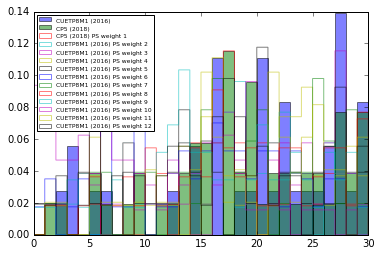

In [92]:
def makevariationsPlot(var, weights, cp5_var, cp5_weights, bins, range, legloc, noPScp_weights=False):
    plt.hist(var, bins, range=range, normed=True, histtype=('step' if noPScp_weights else 'bar'), alpha=0.5, label='CUETP8M1 (2016)');
    plt.hist(cp5_var, bins, range=range, normed=True, histtype=('step' if noPScp_weights else 'bar'), alpha=0.5, label='CP5 (2018)');
    if not noPScp_weights:
        plt.hist([entry[0][0]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 1');
        plt.hist([entry[0][1]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 2');
        plt.hist([entry[0][2]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 3');
        plt.hist([entry[0][3]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 4');
        plt.hist([entry[0][4]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 5');
        plt.hist([entry[0][5]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 6');
        plt.hist([entry[0][6]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 7');
        plt.hist([entry[0][7]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 8');
        plt.hist([entry[0][8]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 9');
        plt.hist([entry[0][9]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 10');
        plt.hist([entry[0][10]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 11');
        plt.hist([entry[0][11]*entry[1] for entry in zip(cp5_weights, cp5_var)], bins, range=range,normed=True, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 12');
    plt.legend(loc=legloc, prop={'size': 6})
    plt.show()
makevariationsPlot(num_constituents, weights, num_constituents_cp5, weights_cp5, 30, (0,30),2)

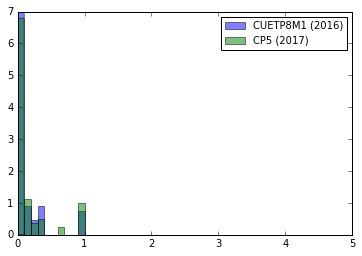

In [41]:
makeVariationsPlot(pt1_frac, weights, pt1_frac_cp5, weights_cp5, 50, (0,5),1)

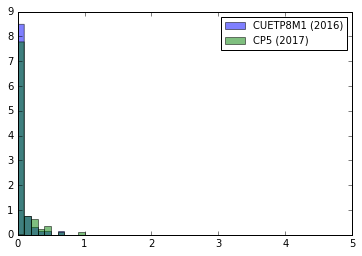

In [44]:
makeVariationsPlot(pt2_frac, weights, pt2_frac_cp5, weights_cp5, 50, (0,5),1)

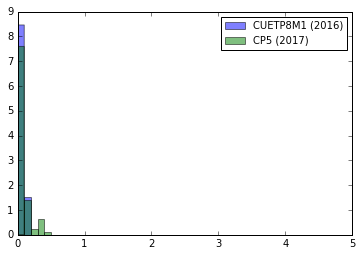

In [45]:
#plt.hist(pt3_frac, bins=50, range=(0,1), alpha=0.5, label='CUETP8M1 (2016)');
#plt.hist(pt3_frac_cp5, bins=50, range=(0,1), alpha=0.5, label='CP5 (2017)');
makeVariationsPlot(pt3_frac, weights, pt3_frac_cp5, weights_cp5, 50, (0,5),1)

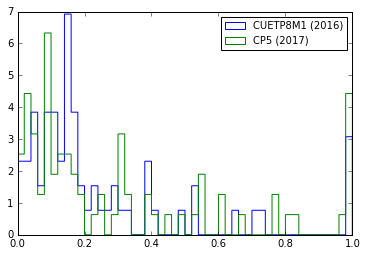

In [46]:
plt.hist(pt123_frac, 50, range=(0,1), normed=True,histtype='step', label='CUETP8M1 (2016)');
plt.hist(pt123_frac_cp5, 50, range=(0,1), normed=True,histtype='step', label='CP5 (2017)');
plt.legend(loc=1, prop={'size': 10})
plt.show()

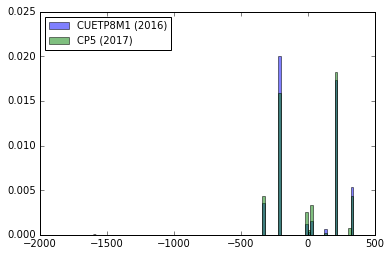

In [47]:
bins = 100
range=(-1600,400)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,2);

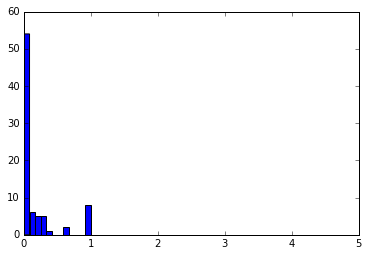

In [48]:
plt.hist(pt1_frac_cp5, bins=60, range=(0,5));

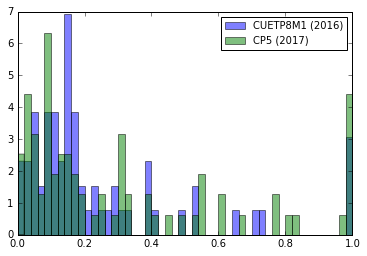

In [50]:
makeVariationsPlot(pt123_frac, weights, pt123_frac_cp5, weights_cp5, 50, (0,1),1)

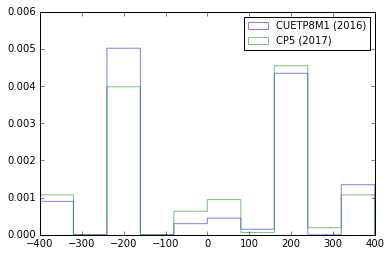

In [51]:
bins = 10
range=(-400,400)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,1, noPSweights=True);